# Homework 3 - Dario Placencio

# 1 Questions

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. (6 pts) The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

$$
\begin{array}{cccc}
\hline
X_{1} & X_{2} & X_{3} & Y \\
\hline
0 & 3 & 0 & \text{Red} \\
2 & 0 & 0 & \text{Red} \\
0 & 1 & 3 & \text{Red} \\
0 & 1 & 2 & \text{Green} \\
-1 & 0 & 1 & \text{Green} \\
1 & 1 & 1 & \text{Red} \\
\hline
\end{array}
$$

Suppose we wish to use this data set to make a prediction for $Y$ when $X_{1} = X_{2} = X_{3} = 0$ using K-nearest neighbors.


In [8]:
# Create the dataframe

table_data = {'Y': ["Red", "Red", "Red", "Green", "Green", "Red"], 
                     'X1': [0, 2, 0, 0, -1, 1], 
                     'X2': [3, 0, 1, 1, 0, 1], 
                     'X3': [0, 0, 3, 2, 1, 1]}	

table = pd.DataFrame(table_data, columns = ['Y', 'X1', 'X2', 'X3'])

In [10]:
# (a) (2 pts) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

# Point X1 = X2 = X3 = 0
X1 = 0
X2 = 0
X3 = 0

# Calculate the Euclidean distance between each observation and the test point
table['Euclidean Distance'] = np.sqrt((table['X1'] - X1)**2 + (table['X2'] - X2)**2 + (table['X3'] - X3)**2)

# Set the display format for float columns
pd.options.display.float_format = '{:.2f}'.format

# Print the table
print(table)

       Y  X1  X2  X3  Euclidean Distance
0    Red   0   3   0                3.00
1    Red   2   0   0                2.00
2    Red   0   1   3                3.16
3  Green   0   1   2                2.24
4  Green  -1   0   1                1.41
5    Red   1   1   1                1.73


The calculated Euclidean distances from each point to the point of interest are as follows:

$$
\begin{array}{cccc}
\hline
X_{1} & X_{2} & X_{3} & \text{Distance} & Y \\
\hline
0 & 3 & 0 & \sqrt{9} = 3 & \text{Red} \\
2 & 0 & 0 & \sqrt{4} = 2 & \text{Red} \\
0 & 1 & 3 & \sqrt{10} \approx 3.16 & \text{Red} \\
0 & 1 & 2 & \sqrt{5} \approx 2.24 & \text{Green} \\
-1 & 0 & 1 & \sqrt{2} \approx 1.41 & \text{Green} \\
1 & 1 & 1 & \sqrt{3} \approx 1.73 & \text{Red} \\
\hline
\end{array}
$$

In [11]:
# (b) (2 pts) What is our prediction with K = 1? Why?

# Sort the table by Euclidean Distance
table = table.sort_values(by=['Euclidean Distance'])

# Print the table
print(table)

# The prediction with K = 1 is Green because the closest observation is Green, with a distance of 1.41.

       Y  X1  X2  X3  Euclidean Distance
4  Green  -1   0   1                1.41
5    Red   1   1   1                1.73
1    Red   2   0   0                2.00
3  Green   0   1   2                2.24
0    Red   0   3   0                3.00
2    Red   0   1   3                3.16


In [12]:
# (c) (2 pts) What is our prediction with K = 3? Why?

# Print the table
print(table)

# The prediction with K = 3 would be Red, from the 3 closest observations, 2 are Red and 1 is Green. The vote would be Red, hence the prediction. The values of these distances are 1.41, 1.73, and 2.00.

       Y  X1  X2  X3  Euclidean Distance
4  Green  -1   0   1                1.41
5    Red   1   1   1                1.73
1    Red   2   0   0                2.00
3  Green   0   1   2                2.24
0    Red   0   3   0                3.00
2    Red   0   1   3                3.16


3. (12 pts) When the number of features p is large, there tends to be a deterioration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when p is large.

(a) (2pts) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly (evenly) distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?

X is uniformly distributed on [0,1].\
We will predict the response for a test observation using the range $[x - 0.05, x + 0.05]$

Given X is uniformly distributed on [0,1], the probability density function (pdf) is:

$$
f(x) = \begin{cases}
1 & \text{if } 0 \leq x \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

Now, calculating the probability of the range the observation within the 10% range:

$$  
\begin{align}
P(x - 0.05 \leq X \leq x + 0.05) &= \int_{x - 0.05}^{x + 0.05} f(x) dx \\
&= \int_{x - 0.05}^{x + 0.05} 1 dx \\
&= x + 0.05 - (x - 0.05) \\
&= 0.1
\end{align}
$$

So, the probability of the range the observation within the 10% range is 0.1.

(b) (2pts) Now suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that predict a test observation’s response using only observations that (X1,X2) are uniformly distributed on [0, 1] × [0, 1]. We wish to are within 10% of the range of X1 and within 10% of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

Both X1, X2 are uniformly distributed on [0,1].\
We will predict the response for a test observation using the range $[x_{1} - 0.05, x_{1} + 0.05]$ for X1 and $[x_{2} - 0.05, x_{2} + 0.05]$ for X2

Given X1, X2 are uniformly distributed on [0,1], the probability density function (pdf) is:

$$
f(x_{1}, x_{2}) = \begin{cases}
1 & \text{if } 0 \leq x_{1}, x_{2} \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

Now, calculating the probability of the range x1 [0.55, 0.65] and x2 [0.3, 0.4]:

$$
\begin{align}
P(0.6 - 0.05 \leq X_{1} \leq 0.6 + 0.05, 0.35 - 0.05 \leq X_{2} \leq 0.35 + 0.05) &= \int_{0.55}^{0.65} \int_{0.3}^{0.4} f(x_{1}, x_{2}) dx_{1} dx_{2} \\
&= \int_{0.55}^{0.65} \int_{0.3}^{0.4} 1 dx_{1} dx_{2} \\
&= \int_{0.55}^{0.65} x_{1} \Big|_{0.3}^{0.4} dx_{2} \\
&= \int_{0.55}^{0.65} 0.1 dx_{2} \\
&= 0.1 \int_{0.55}^{0.65} dx_{2} \\
&= 0.1 x_{2} \Big|_{0.55}^{0.65} \\
&= 0.1 (0.65 - 0.55) \\
&= 0.01
\end{align}
$$

We will use 1% of the available observations to make the prediction when considering both features, with a 10 percent range.

(c) (2pts) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

So, from the previous answer we know that:

For p=1, we use 10% or 0.1 of the observations.\
For p=2, we use 1% or 0.01 of the observations.\

These values are the product of the fractions of observations used in each individual feature's dimension. This is because, given independence and uniform distribution, the fraction of observations used in a multi-dimensional space is the product of the probabilities in each dimension.

Extending this to 100 dimensions, we get:

$$
\begin{align}
(0.1)^{p} &= 1.0 \times 10^{-100} \\
\end{align}
$$

So we will use $1.0 \times 10^{-100}$ of the available observations to make the prediction when considering 100 features, with a 10 percent range.

(d) (3pts) Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there
are very few training observations “near” any given test observation.

This is one of the challanges impose by the "curse of dimensionality", as the number of features (or dimensions) increases, so does the distance between the data points. KNN is approach that leverages on spatial proximity to make predictions, so as the distance between the data points increases, the accuracy of the predictions decreases. Even on data sets with a large number of observations, if the number of features is large, is unlikely that the data points will be close to each other, because the distance is a exponential function of the number of features.

(e) (3pts) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For p =1, 2, and 100, what is the length of each side of the hypercube? Comment what happens to the length of the sides as $\text{lim} p \rightarrow \infty$.


In order to calculate the lenth of the hypercube on each one of the p values, let's first define the volume of the hypercube as:

$$
\begin{align}
V &= L^{p} \\
\end{align}
$$

Where L is the length of each side of the hypercube and p is the number of dimensions.

We know that percentage of observations used in each individual feature's dimension is 0.1, so:

$$
\begin{align}
L^{p} &= 0.1 \\
L &= 0.1^{\frac{1}{p}} \\
\end{align}
$$

Replacing the values of 1,2, and 100 for p, we get:

$$
\begin{align}
L_{p=1} &= 0.1^{\frac{1}{1}} = 0.1 \\
L_{p=2} &= 0.1^{\frac{1}{2}} = 0.316 \\
L_{p=100} &= 0.1^{\frac{1}{100}} = 0.977 \\
\end{align}
$$

This shows that as the value of features increases, so does the length of the sides of the hypercube, getting closer to 1, representing the entire range of the feature. This means that with more features, we progresively need to consider a larger range of values to make predictions, making the "neighborhood" of the KNN model larger, and therefore less accurate.

4. (6 pts) Supoose you trained a classifier for a spam detection system. The prediction result on the test set is summarized in the following table.

$$
\begin{array}{cccc}
\hline
\text{Predicted class} & \text{Spam} & \text{not Spam} \\
\hline
\text{Actual class Spam} & 8 & 2 \\
\text{Actual class not Spam} & 16 & 974 \\
\hline
\end{array}
$$

Calculate

- (a) (2 pts) Accuracy 
- (b) (2 pts) Precision
- (c) (2 pts) Recall 

(a) Accuracy

$$
\begin{align}
Accuracy &= \frac{TP + TN}{TP + TN + FP + FN} \\
&= \frac{8 + 974}{8 + 974 + 16 + 2} \\
&= \frac{982}{1000} \\
&= 0.982
\end{align}
$$

(b) Precision

$$
\begin{align}
Precision &= \frac{TP}{TP + FP} \\
&= \frac{8}{8 + 16} \\
&= \frac{8}{24} \\
&= 0.333
\end{align}
$$

(c) Recall

$$
\begin{align}
Recall &= \frac{TP}{TP + FN} \\
&= \frac{8}{8 + 2} \\
&= \frac{8}{10} \\
&= 0.8
\end{align}
$$

5. (9pts) Again, suppose you trained a classifier for a spam filter. The prediction result on the test set is
summarized in the following table. Here, ”+” represents spam, and ”-” means not spam.

$$
\begin{array}{cccc}
\hline
\text{Confidence Positive} & \text{Correct class} \\
\hline
0.95 & + \\
0.85 & + \\
0.8 & - \\
0.7 & + \\
0.55 & + \\
0.45 & - \\
0.4 & + \\
0.3 & + \\
0.2 & - \\
0.1 & - \\
\hline
\end{array}
$$

(a) (6pts) Draw a ROC curve based on the above table.

In [6]:
# Dataframe

table_data = {'Confidence Positive': [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1],    
                'Correct Class': ["+", "+", "-", "+", "+", "-", "+", "+", "-", "-"]}	

table = pd.DataFrame(table_data, columns = ['Confidence Positive', 'Correct Class'])

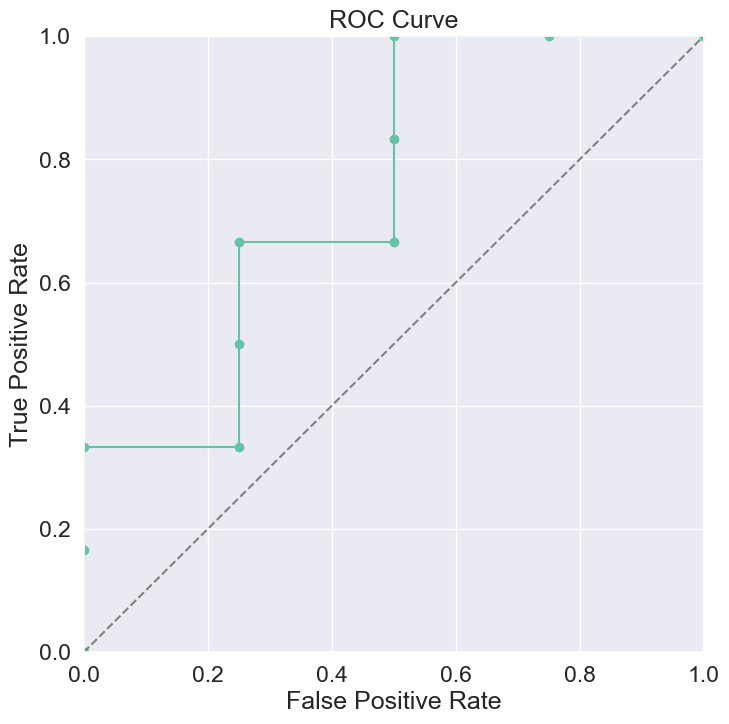

In [7]:
# Initialize variables
tpr_list = []
fpr_list = []

positive = sum(table['Correct Class'] == '+')
negative = sum(table['Correct Class'] == '-')

# Iterate through thresholds
for threshold in table['Confidence Positive']:
    pred_class = [ '+' if x >= threshold else '-' for x in table['Confidence Positive']]
    table['Predicted Class'] = pred_class
    
    # Compute True Positive, False Positive
    tp = sum((table['Correct Class'] == '+') & (table['Predicted Class'] == '+'))
    fp = sum((table['Correct Class'] == '-') & (table['Predicted Class'] == '+'))
    
    # Compute True Positive Rate, False Positive Rate
    tpr = tp / positive
    fpr = fp / negative
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Add (0, 0) and (1, 1) to make the plot start at the origin and end at top right
tpr_list = [0] + tpr_list + [1]
fpr_list = [0] + fpr_list + [1]

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr_list, tpr_list, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

(b) (3pts) (Real-world open question) Suppose you want to choose a threshold parameter so that mails
with confidence positives above the threshold can be classified as spam. Which value will you choose?
Justify your answer based on the ROC curve.

Considering the context, what I would like to avoid is to have False Positives, emails that are actually not Spam, and that I would be missing from my inbox because of missclassification. So, I would choose a threshold that would minimize the False Positive Rate (FPR), based on the values of the ROC curve, this treshold would be .85, which would give me a FPR of 0, but in comparison a little bit of a better classification of the True Positives (TPR) than the threshold of 0.95.

6. (8 pts) In this problem, we will walk through a single step of the gradient descent algorithm for logistic regression. As a reminder,

$$\hat{y} = f(x, \theta)$$
$$f(x;\theta) = \sigma(\theta^\top x)$$
$$\text{Cross entropy loss } L(\hat{y}, y) = -[y \log  \hat{y} + (1-y)\log(1-\hat{y})]$$
$$\text{The single update step } \theta^{t+1} = \theta^{t} - \eta \nabla_{\theta} L(f(x;\theta), y) $$

(a) Compute the first gradient $\nabla_{\theta} L(f(x;\theta), y)$.

The first gradient of the loss function is:

$$
\begin{align}
\nabla_{\theta} L(f(x;\theta), y) &= \frac{\partial}{\partial \theta} L(f(x;\theta), y) \\
&= \frac{\partial}{\partial \theta} -[y \log  \hat{y} + (1-y)\log(1-\hat{y})] \\
&= -[y \frac{\partial}{\partial \theta} \log  \hat{y} + (1-y)\frac{\partial}{\partial \theta} \log(1-\hat{y})] \\
&= -[y \frac{\partial}{\partial \theta} \log  \sigma(\theta^\top x) + (1-y)\frac{\partial}{\partial \theta} \log(1-\sigma(\theta^\top x))] \\
&= -[y \frac{1}{\sigma(\theta^\top x)} \frac{\partial}{\partial \theta} \sigma(\theta^\top x) + (1-y)\frac{1}{1-\sigma(\theta^\top x)}\frac{\partial}{\partial \theta} \log(1-\sigma(\theta^\top x))] \\
&= -[y \frac{1}{\sigma(\theta^\top x)} \sigma(\theta^\top x) (1 - \sigma(\theta^\top x)) x + (1-y)\frac{1}{1-\sigma(\theta^\top x)}(-\sigma(\theta^\top x) (1 - \sigma(\theta^\top x)) x)] \\
&= -[y (1 - \sigma(\theta^\top x)) x + (1-y)(-\sigma(\theta^\top x) x)] \\
&= -[y x - y \sigma(\theta^\top x) x - \sigma(\theta^\top x) x + y \sigma(\theta^\top x) x] \\
&= -[y x - \sigma(\theta^\top x) x] \\
&= -[y - \sigma(\theta^\top x)] x \\
&= -[y - f(x;\theta)] x \\
\end{align}
$$

(b) Now assume a two dimensional input. After including a bias parameter for the first dimension, we will have

$\theta\in\mathbb{R}^3$.
$$ \text{Initial parameters : }  \theta^{0}=[0, 0, 0]$$
$$ \text{Learning rate }\eta=0.1$$
$$ \text{data example : } x=[1, 3, 2], y=1$$

Compute the updated parameter vector $\theta^{1}$ from the single update step.

We know that:

$$
\begin{align}
\theta^{t+1} &= \theta^{t} - \eta \nabla_{\theta} L(f(x;\theta), y) \\
\end{align}
$$

So, we need to first calculate $\hat{y}$ - $f(x;\theta)$. We know that:

$$
\begin{align}
z &= \theta^\top x \\
\end{align}
$$

So, for the given data example, we have:

$$
\begin{align}
z &= \theta^\top x \\
&= [0, 0, 0]^\top [1, 3, 2] \\
&= 0 \\
\end{align}
$$

And, we know that:

$$
\begin{align}
\hat{y} &= \sigma(z) \\
&= \sigma(0) \\
&= frac{1}{1 + e^{-0}} \\
&= 0.5 \\
\end{align}
$$

Now, we can calculate the updated parameter vector $\theta^{1}$:

$$
\begin{align}
\theta^{1} &= \theta^{0} - \eta \nabla_{\theta} L(f(x;\theta), y) \\
&= [0, 0, 0] - 0.1 (-[y - f(x;\theta)] x) \\
&= [0, 0, 0] - 0.1 (-[1 - 0.5] [1, 3, 2]) \\
&= [0, 0, 0] - 0.1 (-[0.5] [1, 3, 2]) \\
&= [0, 0, 0] - 0.1 (-[0.5, 1.5, 1]) \\
&= [0, 0, 0] - [-0.05, -0.15, -0.1] \\
&= [0.05, 0.15, 0.1] \\
\end{align}
$$    

## 2. Programing Part

1. (10 pts) Use the whole D2z.txt as training set.  Use Euclidean distance (i.e. $A=I$). Visualize the predictions of 1NN on a 2D grid $[-2:0.1:2]^2$. That is, you should produce test points whose first feature goes over $-2, -1.9, -1.8, \ldots, 1.9, 2$, so does the second feature independent of the first feature. You should overlay the 
training set in the plot, just make sure we can tell which points are training, which are grid.

In [11]:
# Read D2z txt
D2z = pd.read_csv('D2z.txt', sep=' ', header=None)

In [12]:
# Add a column names
D2z.columns = ['X1', 'X2', 'Label']

In [13]:
# Print the first 5 rows
print(D2z.head())

         X1        X2  Label
0 -0.333338 -0.087171      0
1 -1.531730  0.358194      1
2  1.549590 -0.364050      0
3 -1.349910  0.252063      1
4  1.283850 -0.531146      0


In [14]:
# Create a grid
x, y = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))
grid = np.c_[x.ravel(), y.ravel()]

In [15]:
# Prediction List
predictions = []

In [17]:
# 1NN and Predictions
for point in grid:
    # Calculate the Euclidean distance between each observation and the test point
    D2z['Euclidean Distance'] = np.sqrt((D2z['X1'] - point[0])**2 + (D2z['X2'] - point[1])**2)
    
    # Sort the table by Euclidean Distance
    D2z = D2z.sort_values(by=['Euclidean Distance'])
    
    # Append the prediction to the list
    predictions.append(D2z.iloc[0]['Label'])

# Reshape the predictions
predictions = np.array(predictions).reshape(x.shape)

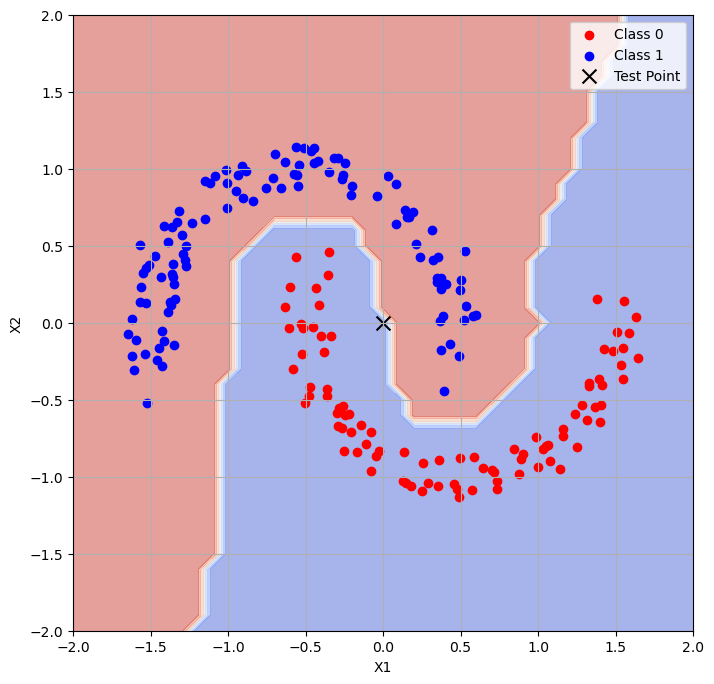

In [27]:
# Plotting
plt.figure(figsize=(8, 8))
plt.contourf(x, y, predictions, cmap='coolwarm', alpha=0.5)

# Separate data by label for legend
class0 = D2z[D2z['Label'] == 0]
class1 = D2z[D2z['Label'] == 1]

# Create separate scatter plots for each class and label them
plt.scatter(class0['X1'], class0['X2'], color='red', label='Class 0')
plt.scatter(class1['X1'], class1['X2'], color='blue', label='Class 1')

# Test point
plt.scatter(0, 0, c='black', marker='x', s=100, label='Test Point')

plt.xlabel('X1')
plt.ylabel('X2')   
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid(True)
plt.legend() 
plt.show();

{Spam filter} 

Now, we will use 'emails.csv' as our dataset. The description is as follows.

- Task: spam detection
- The number of rows: 5000
- The number of features: 3000 (Word frequency in each email)
- The label (y) column name: `Predictor'
- For a single training/test set split, use Email 1-4000 as the training set, Email 4001-5000 as the test set.
- For 5-fold cross validation, split dataset in the following way.
    - Fold 1, test set: Email 1-1000, training set: the rest (Email 1001-5000)
    - Fold 2, test set: Email 1000-2000, training set: the rest
    - Fold 3, test set: Email 2000-3000, training set: the rest
    - Fold 4, test set: Email 3000-4000, training set: the rest
    - Fold 5, test set: Email 4000-5000, training set: the rest	

In [3]:
# Read emails.csv
emails = pd.read_csv('emails.csv')

In [4]:
# Print the first 5 rows
print(emails.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [5]:
# Shape of the dataframe
print(emails.shape)

(5000, 3002)


In [6]:
# Drop Email No. column
emails = emails.drop('Email No.', axis=1)

In [7]:
# Shape of the dataframe
print(emails.shape)

(5000, 3001)


For a single training/test set split, use Email 1-4000 as the training set, Email 4001-5000 as the test
set.

For 5-fold cross validation, split dataset in the following way.

- Fold 1, test set: Email 1-1000, training set: the rest (Email 1001-5000)
- Fold 2, test set: Email 1000-2000, training set: the rest
- Fold 3, test set: Email 2000-3000, training set: the rest
- Fold 4, test set: Email 3000-4000, training set: the rest
- Fold 5, test set: Email 4000-5000, training set: the rest

2. (8 pts) Implement 1NN, Run 5-fold cross validation. Report accuracy, precision, and recall in each fold.

In [45]:
# Implement 1NN, with 5-fold cross validation without using sklearn

# Assuming you have a DataFrame `data` loaded from 'emails.csv'
# X - feature matrix, y - labels
X = emails.drop(columns=['Prediction']).values
y = emails['Prediction'].values

# Euclidean distance calculation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Prediction function for 1NN
def predict_one(x_train, y_train, x_test_single):
    distances = euclidean_distance(x_train, x_test_single)
    nearest_y = y_train[np.argmin(distances)]
    return nearest_y

# Metric calculations
def compute_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    
    return accuracy, precision, recall

# 5-fold CV splits
folds = [
    (np.arange(0, 1000), np.arange(1000, 5000)),
    (np.arange(1000, 2000), np.concatenate([np.arange(0, 1000), np.arange(2000, 5000)])),
    (np.arange(2000, 3000), np.concatenate([np.arange(0, 2000), np.arange(3000, 5000)])),
    (np.arange(3000, 4000), np.concatenate([np.arange(0, 3000), np.arange(4000, 5000)])),
    (np.arange(4000, 5000), np.arange(0, 4000))
]

# Applying 1NN and Evaluation
for i, (test_idx, train_idx) in enumerate(folds):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    predictions = np.array([predict_one(X_train, y_train, x_t) for x_t in X_test])
    
    acc, precision, recall = compute_metrics(y_test, predictions)
    
    print(f'Fold {i+1}:')
    print(f'Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n')

Fold 1:
Accuracy: 0.8250, Precision: 0.6545, Recall: 0.8175

Fold 2:
Accuracy: 0.8530, Precision: 0.6857, Recall: 0.8664

Fold 3:
Accuracy: 0.8620, Precision: 0.7212, Recall: 0.8380

Fold 4:
Accuracy: 0.8510, Precision: 0.7164, Recall: 0.8163

Fold 5:
Accuracy: 0.7750, Precision: 0.6057, Recall: 0.7582



(12 pts) Implement logistic regression (from scratch). Use gradient descent (refer to question 6 from part 1) to find the optimal parameters. You may need to tune your learning rate to find a good optimum. Run 5-fold cross validation. Report accuracy, precision, and recall in each fold.

In [49]:
def sigmoid(z):
    # Stabilization
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    m = len(y)
    return (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        errors = y - predictions
        gradient = np.dot(X.T, errors)
        theta += alpha * gradient
    return theta

def predict(X, theta):
    predictions = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in predictions]

In [51]:
# Define thetas, alpha, and iterations
theta = np.zeros(X.shape[1])
alpha = [0.1, 0.01, 0.001]  # Values of alpha to try
iterations = 1000  

def compute_metrics(y_true, y_pred):
    # True Positive, False Positive, True Negative and False Negative
    TP = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
    FP = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
    TN = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
    FN = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))

    # Accuracy, Precision, and Recall
    acc = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    
    return acc, precision, recall


In [52]:
# Applying Logistic Regression over 5-fold CV
for i, (test_idx, train_idx) in enumerate(folds):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    for a in alpha:
        theta_optimal = gradient_descent(X_train, y_train, theta, a, iterations)
        predictions = predict(X_test, theta_optimal)
        acc, precision, recall = compute_metrics(y_test, predictions)
        print(f'Fold {i+1}, alpha={a}:')
        print(f'Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n')

Fold 1, alpha=0.1:
Accuracy: 0.9060, Precision: 0.8687, Recall: 0.7895

Fold 1, alpha=0.01:
Accuracy: 0.9180, Precision: 0.8859, Recall: 0.8175

Fold 1, alpha=0.001:
Accuracy: 0.9180, Precision: 0.8859, Recall: 0.8175

Fold 2, alpha=0.1:
Accuracy: 0.9260, Precision: 0.8889, Recall: 0.8375

Fold 2, alpha=0.01:
Accuracy: 0.9300, Precision: 0.9027, Recall: 0.8375

Fold 2, alpha=0.001:
Accuracy: 0.9300, Precision: 0.9027, Recall: 0.8375

Fold 3, alpha=0.1:
Accuracy: 0.9250, Precision: 0.9409, Recall: 0.7852

Fold 3, alpha=0.01:
Accuracy: 0.9300, Precision: 0.9315, Recall: 0.8134

Fold 3, alpha=0.001:
Accuracy: 0.9300, Precision: 0.9315, Recall: 0.8134

Fold 4, alpha=0.1:
Accuracy: 0.9540, Precision: 0.9366, Recall: 0.9048

Fold 4, alpha=0.01:
Accuracy: 0.9540, Precision: 0.9366, Recall: 0.9048

Fold 4, alpha=0.001:
Accuracy: 0.9540, Precision: 0.9366, Recall: 0.9048

Fold 5, alpha=0.1:
Accuracy: 0.9430, Precision: 0.9029, Recall: 0.9118

Fold 5, alpha=0.01:
Accuracy: 0.9400, Precision: 0.8

In [53]:
results_log = {
    "Fold": [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
    "Alpha": [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
    "Accuracy": [0.906, 0.918, 0.918, 0.926, 0.930, 0.930, 0.925, 0.930, 0.930, 0.954, 0.954, 0.954, 0.943, 0.940, 0.941],
    "Precision": [0.8687, 0.8859, 0.8859, 0.8889, 0.9027, 0.9027, 0.9409, 0.9315, 0.9315, 0.9366, 0.9366, 0.9366, 0.9029, 0.8994, 0.8997],
    "Recall": [0.7895, 0.8175, 0.8175, 0.8375, 0.8375, 0.8375, 0.7852, 0.8134, 0.8134, 0.9048, 0.9048, 0.9048, 0.9118, 0.9052, 0.9085]
}

results_log_df = pd.DataFrame(results_log)

In [55]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

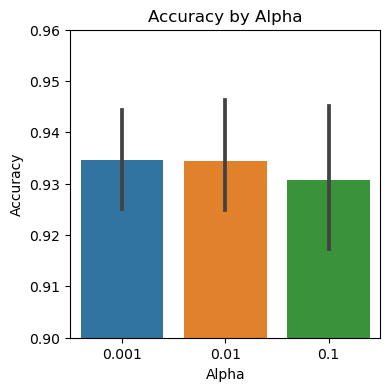

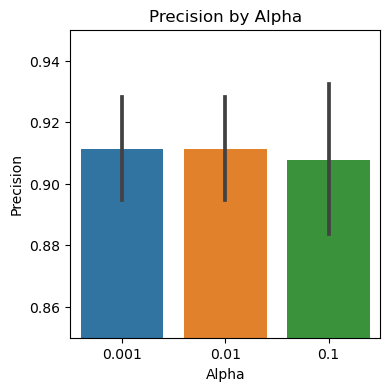

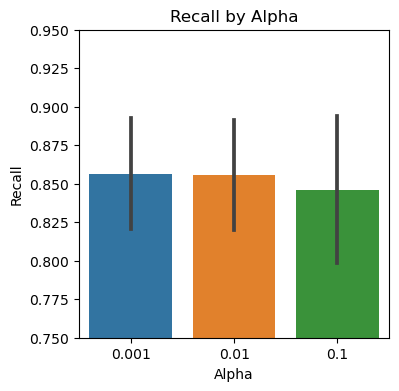

In [58]:
# Presenting the results by alpha

# Accuracy
plt.figure(figsize=(4, 4))
sns.barplot(x='Alpha', y='Accuracy', data=results_log_df)
plt.title('Accuracy by Alpha')
plt.ylim([0.9, 0.96])
plt.show()

# Precision
plt.figure(figsize=(4, 4))
sns.barplot(x='Alpha', y='Precision', data=results_log_df)
plt.title('Precision by Alpha')
plt.ylim([0.85, 0.95])
plt.show()

# Recall
plt.figure(figsize=(4, 4))
sns.barplot(x='Alpha', y='Recall', data=results_log_df)
plt.title('Recall by Alpha')
plt.ylim([0.75, 0.95])
plt.show()


In [59]:
# Calculate the most optimal alpha
optimal_alpha = results_log_df.groupby('Alpha').mean().idxmax().values[0]
print(f'The most optimal alpha is {optimal_alpha}')

The most optimal alpha is 0.001


In [62]:
# Report accuracy, precision, and recall for the optimal alpha for each fold 
results_log_df[results_log_df['Alpha'] == optimal_alpha]

,Fold,Alpha,Accuracy,Precision,Recall
2,1,0.001,0.918,0.8859,0.8175
5,2,0.001,0.930,0.9027,0.8375
8,3,0.001,0.930,0.9315,0.8134
11,4,0.001,0.954,0.9366,0.9048
14,5,0.001,0.941,0.8997,0.9085


4. (10 pts) Run 5-fold cross validation with kNN varying k (k=1, 3, 5, 7, 10). Plot the average accuracy versus k, and list the average accuracy of each case.

In [65]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

def kNN(X_train, y_train, X_test, k):
    y_pred = np.zeros(X_test.shape[0])
    for idx, test_instance in enumerate(X_test):
        distances = euclidean_distance(X_train, test_instance)
        neighbors_indices = np.argsort(distances)[:k]
        neighbors_labels = y_train[neighbors_indices]
        y_pred[idx] = np.bincount(neighbors_labels).argmax()  # majority vote
    return y_pred

In [68]:
def cross_validation_split(X, y, n_folds=5):
    fold_sizes = X.shape[0] // n_folds
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    folds = []
    for i in range(n_folds):
        test_idx = indices[i*fold_sizes:(i+1)*fold_sizes]
        train_idx = np.setdiff1d(indices, test_idx)
        folds.append((train_idx, test_idx))
    return folds

In [66]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [70]:
def perform_knn_cv(X, y, k_values, folds):
    results = np.zeros((len(k_values), len(folds)))
    
    for i, k in enumerate(k_values):
        for j, (test_idx, train_idx) in enumerate(folds):
            X_train, y_train = X[train_idx], y[train_idx]
            X_test, y_test = X[test_idx], y[test_idx]
            
            y_pred = kNN(X_train, y_train, X_test, k)
            acc = accuracy(y_test, y_pred)
            results[i, j] = acc
            
    return results.mean(axis=1)

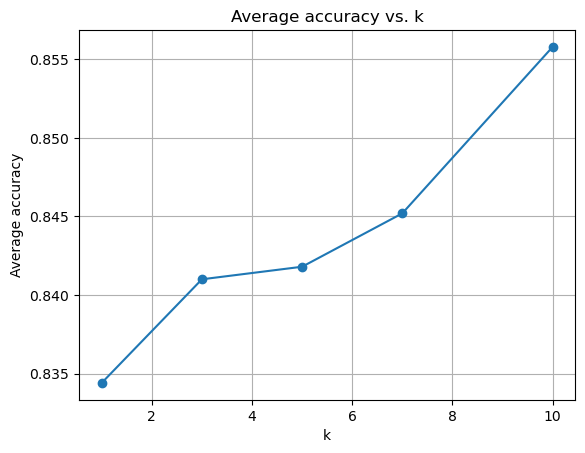

In [71]:
k_values = [1, 3, 5, 7, 10]
avg_accuracies = perform_knn_cv(X, y, k_values, folds)

plt.plot(k_values, avg_accuracies, marker='o')
plt.title('Average accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.grid(True)
plt.show();

In [72]:
# Printing the average accuracies
for k, acc in zip(k_values, avg_accuracies):
    print(f"Average accuracy for k={k}: {acc:.4f}")

Average accuracy for k=1: 0.8344
Average accuracy for k=3: 0.8410
Average accuracy for k=5: 0.8418
Average accuracy for k=7: 0.8452
Average accuracy for k=10: 0.8558


5. (10 pts) Use a single training/test setting. Train kNN (k=5) and logistic regression on the training set, and draw ROC curves based on the test set.

In [8]:
# X - feature matrix, y - labels
X = emails.drop(columns=['Prediction']).values
y = emails['Prediction'].values

In [9]:
# Train Test Split
X_train, y_train = X[:4000], y[:4000]
X_test, y_test = X[4000:], y[4000:]

In [66]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def kNN_proba(X_train, y_train, X_test, k=5):
    y_pred_proba = []
    for x in X_test:
        distances = euclidean_distance(X_train, x)
        indices = np.argsort(distances)[:k]
        k_neighbors = y_train[indices]
        
        # Calculate class probabilities based on the majority class among k neighbors
        proba = np.sum(k_neighbors) / k
        y_pred_proba.append(proba)
    
    return np.array(y_pred_proba)

theta = np.zeros(X_train.shape[1])

def predict_proba(X, theta):
    return sigmoid(np.dot(X, theta))

In [71]:
def roc_curve(y_true, y_pred_proba):
    thresholds = np.arange(0, 1.01, 0.01)
    tpr_list = []
    fpr_list = []
    
    for threshold in thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        pred_class = [1 if x >= threshold else 0 for x in y_pred_proba]
        
        # Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
        tp = np.sum((y_true == 1) & (pred_class == 1))
        fp = np.sum((y_true == 0) & (pred_class == 1))
        tn = np.sum((y_true == 0) & (pred_class == 0))
        fn = np.sum((y_true == 1) & (pred_class == 0))
        
        # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return fpr_list, tpr_list

In [72]:
# For kNN
y_pred_proba_5nn = kNN_proba(X_train, y_train, X_test, k=5)
fpr_5nn, tpr_5nn = roc_curve(y_test, y_pred_proba_5nn)

# For Logistic Regression
y_pred_proba_log = predict_proba(X_test, theta)
fpr_log, tpr_log = roc_curve(y_test, y_pred_proba_log)

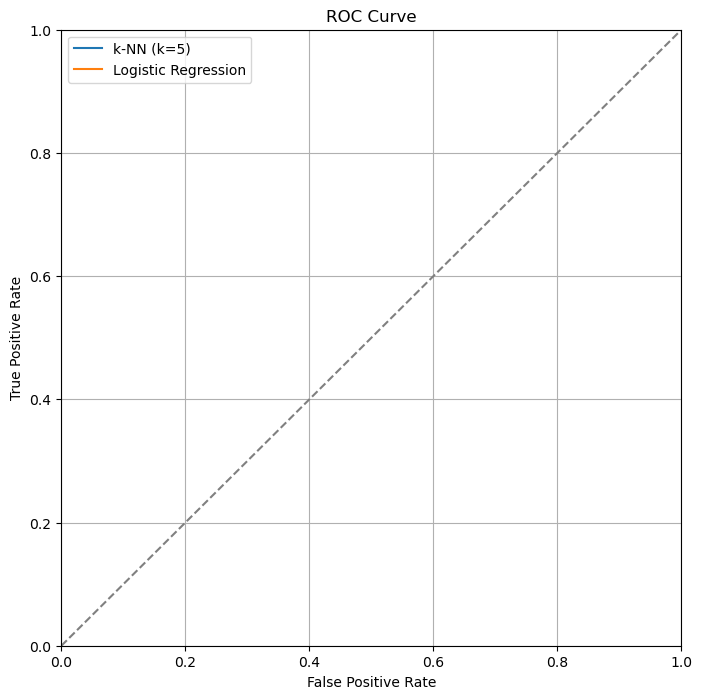

In [73]:
# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr_5nn, tpr_5nn, label='k-NN (k=5)')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show();